# Task 3: Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [4]:
# Load datasets
customers_df = pd.read_csv('/content/Customers.csv')
products_df = pd.read_csv('/content/Products.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')

In [5]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [8]:
# Aggregate transaction data by customer
customer_transactions = transactions_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()
customer_profiles = pd.merge(customers_df, customer_transactions, on='CustomerID', how='left').fillna(0)

In [12]:
# Normalize features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(customer_profiles[['TotalValue', 'Quantity']])

In [13]:
# Prepare features for clustering
clustering_features = scaler.fit_transform(customer_profiles[['TotalValue', 'Quantity']])

In [14]:
# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(clustering_features)
customer_profiles['Cluster'] = clusters

In [15]:
# Evaluate clustering
db_index = davies_bouldin_score(clustering_features, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.7102764046737506


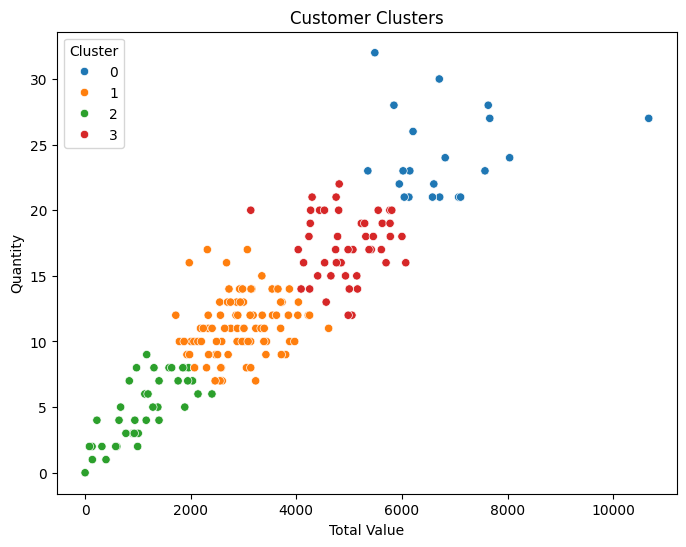

In [16]:
# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=customer_profiles['TotalValue'],
    y=customer_profiles['Quantity'],
    hue=customer_profiles['Cluster'],
    palette='tab10'
)
plt.title("Customer Clusters")
plt.xlabel("Total Value")
plt.ylabel("Quantity")
plt.legend(title="Cluster")
plt.show()

In [17]:
# Save clustering results
customer_profiles[['CustomerID', 'Cluster']].to_csv('Harsh_Kalburgi_Clustering.csv', index=False)